# DOMACAK:

## make the page wider:

In [1]:
%%html
<style>
.container {
    width: 90%; /* Adjust the width as per your preference */
}
</style>


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats # kvuli z_scores
from sklearn.linear_model import LinearRegression # kvuli doplneni 
from sklearn.preprocessing import StandardScaler

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from kejla_utils import *

In [4]:
FIG_SIZE = (10,8)

In [5]:
risk_data = pd.read_csv("./data/3_lekce_creditdata.csv")
risk_data

,ID,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [6]:
risk_data_encoded = one_hot_encode(risk_data, ["Sex", "Housing", "Saving_accounts", "Risk"])
risk_data_encoded

,ID,Age,Job,Checking_account,Credit_amount,Duration,Purpose,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving_accounts_little,Saving_accounts_moderate,Saving_accounts_quite rich,Saving_accounts_rich,Risk_bad,Risk_good
0,0,67,2,little,1169,6,radio/TV,False,True,False,True,False,False,False,False,False,False,True
1,1,22,2,moderate,5951,48,radio/TV,True,False,False,True,False,True,False,False,False,True,False
2,2,49,1,NaN,2096,12,education,False,True,False,True,False,True,False,False,False,False,True
3,3,45,2,little,7882,42,furniture/equipment,False,True,True,False,False,True,False,False,False,False,True
4,4,53,2,little,4870,24,car,False,True,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1,NaN,1736,12,furniture/equipment,True,False,False,True,False,True,False,False,False,False,True
996,996,40,3,little,3857,30,car,False,True,False,True,False,True,False,False,False,False,True
997,997,38,2,NaN,804,12,radio/TV,False,True,False,True,False,True,False,False,False,False,True
998,998,23,2,little,1845,45,radio/TV,False,True,True,False,False,True,False,False,False,True,False


### vidim, ze ID je vsude unique, takze zadny radek neni duplikovan...  ze je Checking_account nekde null resit nehodlam, ostatni sloupce jsou v poho...

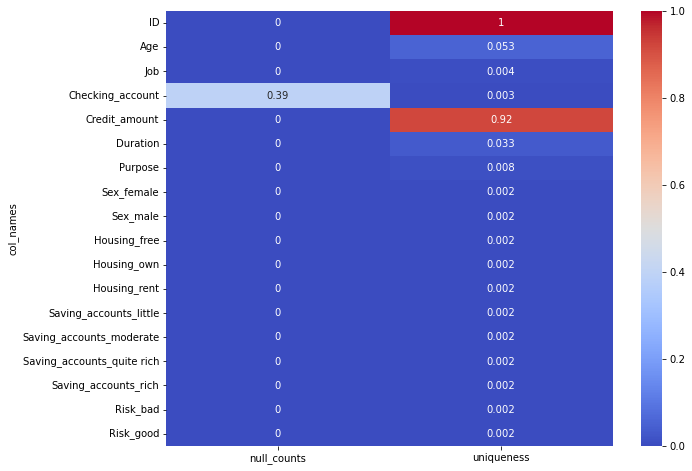

In [7]:
plot_nullness_and_uniqueness(risk_data_encoded, only_null=False)

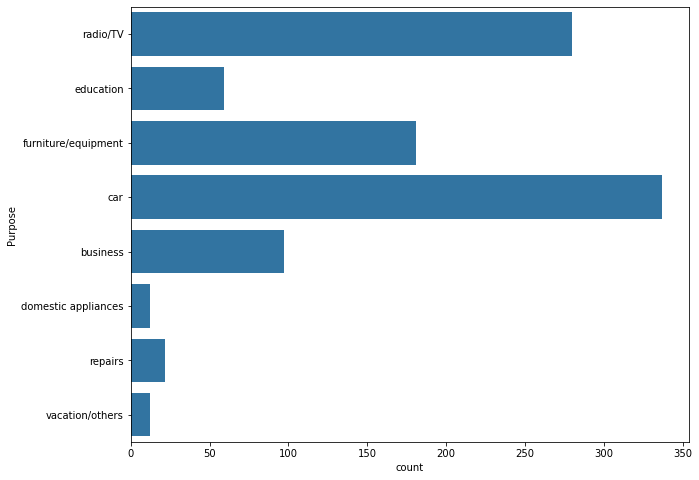

In [8]:
plt.figure(figsize=FIG_SIZE)
sns.countplot(risk_data['Purpose'])
plt.show()

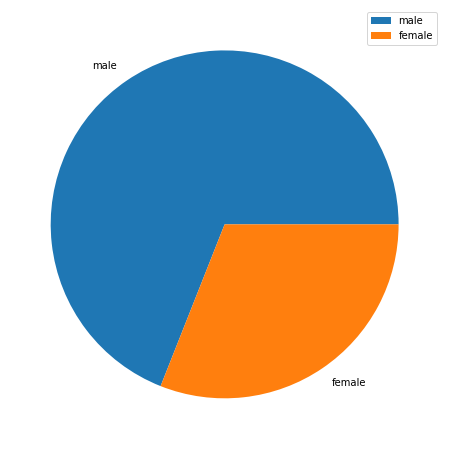

In [9]:
plt.figure(figsize=FIG_SIZE)
plt.pie(risk_data['Sex'].value_counts(dropna=False), labels=risk_data['Sex'].value_counts(dropna=False).index)
plt.legend()
plt.show()

In [10]:
get_cormatrix(risk_data_encoded)

,ID,Age,Job,Credit_amount,Duration
ID,1.000000,-0.010096,-0.027345,0.013488,0.030788
Age,-0.010096,1.000000,0.015673,0.032716,-0.036136
Job,-0.027345,0.015673,1.000000,0.285385,0.210910
Credit_amount,0.013488,0.032716,0.285385,1.000000,0.624984
Duration,0.030788,-0.036136,0.210910,0.624984,1.000000


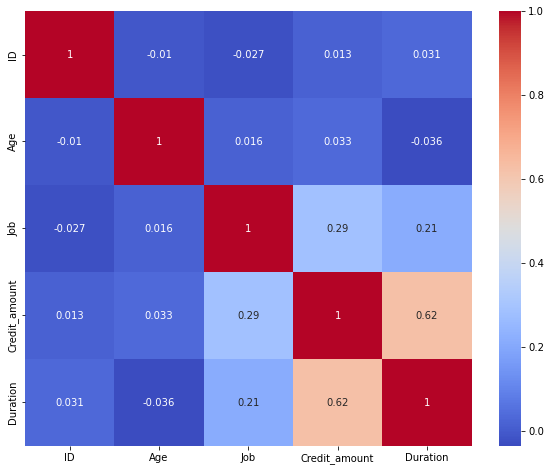

In [11]:
plot_corhmap(risk_data)

### najit nejkorelovanejsi sloupce se sloupcem Duration:

In [12]:
most_corred_to_Duration = get_most_cor_colnames_to_target(risk_data_encoded, 3, 'Duration')
most_corred_to_Duration

['Credit_amount', 'Job', 'Age']

In [13]:
interesting_columns = most_corred_to_Duration + ["Duration"]

### rescale and plot boxplots:

In [14]:
re_scaled = risk_data.copy()
scaler = StandardScaler()
re_scaled[interesting_columns] = scaler.fit_transform(re_scaled[interesting_columns])

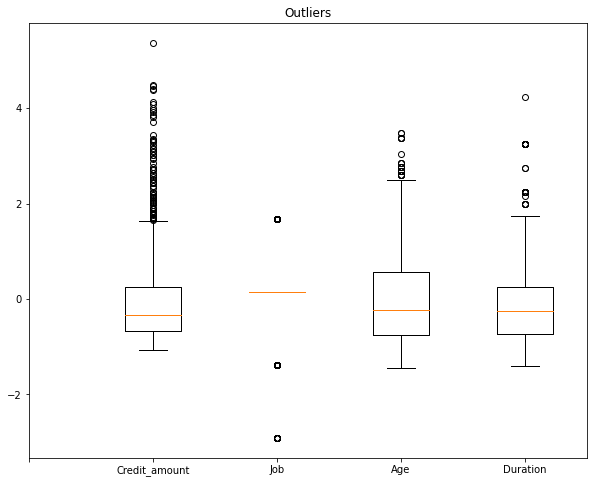

In [15]:
plt.figure(figsize=FIG_SIZE)
plt.boxplot(re_scaled[interesting_columns])
plt.title("Outliers")
plt.xticks(ticks=list(range(len(interesting_columns)+1)) ,labels=[""]+interesting_columns)
plt.show()

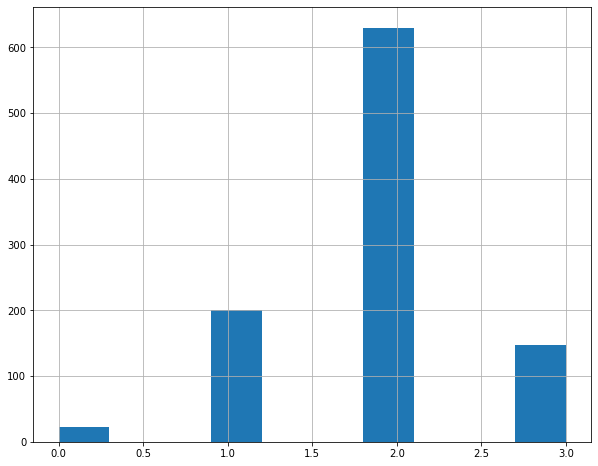

In [16]:
plt.figure(figsize=FIG_SIZE)
risk_data["Job"].hist()
plt.show()

In [23]:
def plot_z_scores_scatter(df, x_colname="x_column", y_colname="y_column", N_categories = 4 ,figsize = (10,8)):
    colors_universe = ["blue", "green", "red", "cyan", "magenta", "yellow", "black",
          "orange", "purple", "brown", "pink", "gray", "olive", "teal", "navy"]
    colors = colors_universe[:N_categories]
    plt.figure(figsize=figsize)
    for i, color in enumerate(colors):
        #print(f"{i} {color}")
        curr_outliers_DF = get_outliers(df, x_colname, i)

        plt.scatter(curr_outliers_DF[x_colname], curr_outliers_DF[y_colname], color=color, label = f"z_score > {i}")

    plt.legend()
    plt.show()


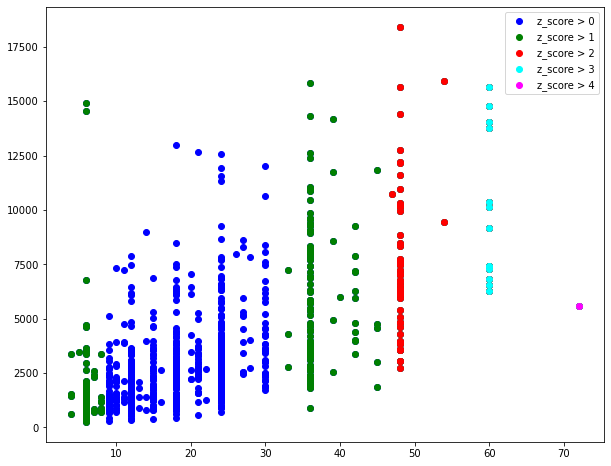

In [24]:
plot_z_scores_scatter(risk_data, 'Duration','Credit_amount', N_categories=5)